In [1]:
import pandas as pd
import numpy as np
import essentia 
import essentia.standard as ess 
import seaborn as sns

# DATASETS

In [2]:
df=pd.read_csv("LabelWF.csv")
data=df.iloc[:,1:]
datas= data.fillna(0)
df2=pd.read_csv("LabelBE.csv")
data2=df2.iloc[:,1:]
datas2= data2.fillna(0)


In [3]:
merged_data = pd.merge(datas, datas2, how='outer',on=['Loudness', 'RMS', 'spectralflux', 'Centroid', 'HighFrequency', 'ZCR',
       'Energy', 'PitchSalience', 'EffectiveDuration', 'Decrease', 'Intensity',
       'c1', 'c2', 'c3', 'c4', 'c5', 'DynComplex', 'LDB', 'Frequencies',
       'Amplitudes', 'Mean', 'Median', 'Variance', 'MaxToTotal', 'MinToTotal',
       'TCToTotal', 'FlatnessSFX', 'InstantPower', 'logAttackTime',
       'attackStart', 'attackStop', 'Spread', 'Skewness', 'Kurtosis', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', 'SpecComplex', 'RollOff', 'StrongPeak', 'Label'])


In [4]:
merged_data = merged_data.drop(['c1', 'c2', 'c3', 'c4', 'c5'], axis=1)
merged_data

,Loudness,RMS,spectralflux,Centroid,HighFrequency,ZCR,Energy,PitchSalience,EffectiveDuration,Decrease,...,34,35,36,37,38,39,SpecComplex,RollOff,StrongPeak,Label
0,636.574341,0.263463,123.715660,0.523523,88311032.0,0.093061,15305.565430,0.250594,0.476440,-0.000896,...,0.037915,0.039987,0.035348,0.031390,0.036538,0.036202,100.0,1348.400024,3.452128e+06,4
1,390.424988,0.182927,85.898033,0.562918,45242984.0,0.133274,7378.472168,0.162448,0.206213,-0.001279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,2968.399902,3.938371e+05,4
2,216.328857,0.117738,55.286957,0.317760,33935804.0,0.095687,3056.647705,0.103867,0.036281,0.000504,...,0.023598,0.028323,0.022820,0.022308,0.020367,0.018357,100.0,2438.600098,1.618121e+06,4
3,85.865311,0.059080,27.742624,0.500412,7063722.0,0.102576,769.653198,0.092782,0.006803,-0.000062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,4149.000000,0.000000e+00,4
4,277.413788,0.141751,66.562531,0.385765,39559824.0,0.200644,4430.570801,0.087282,0.085057,0.000140,...,0.017491,0.019708,0.020650,0.019951,0.018299,0.018177,100.0,6688.600098,1.129759e+05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,380.672516,0.179507,84.291672,0.937214,101693848.0,0.015515,7105.085938,0.074529,0.241020,0.000402,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,314.399994,1.658474e+06,5
508,327.649719,0.160497,75.365303,0.530154,69796408.0,0.078113,5679.929199,0.053028,0.244308,-0.000026,...,0.008420,0.006279,0.004611,0.003427,0.003191,0.002024,100.0,8270.400391,7.502732e+05,5
509,413.535400,0.190949,89.664673,1.399865,96477128.0,0.018395,8039.753906,0.089876,0.433424,0.000057,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,360.000000,3.837139e+05,5
510,403.449219,0.187462,88.027527,0.875160,105171264.0,0.252000,7748.845703,0.066099,0.410658,0.000188,...,0.071617,0.039488,0.020706,0.011390,0.004484,0.001453,100.0,9532.400391,1.642735e+06,5


In [5]:
merged_data['Label'].unique
merged_data['Label'].value_counts()

4    70
0    69
3    66
7    64
1    64
6    62
5    59
2    58
Name: Label, dtype: int64

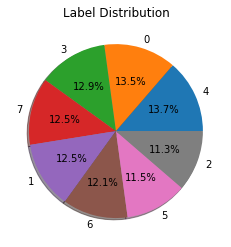

In [6]:
from matplotlib import pyplot as plt
label_counts = merged_data['Label'].value_counts()
labels = label_counts.index
counts = label_counts.values
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)

# Add title to the chart
plt.title('Label Distribution')

# Display the chart
plt.show()


# Separating Data.

In [7]:
import numpy as np
#Separate the data in which are the sounds that I want to verify first.
X=merged_data.drop('Label',axis=1) #features
y=merged_data['Label'] #Target

print (X.shape)
print (y.shape)

(512, 72)
(512,)


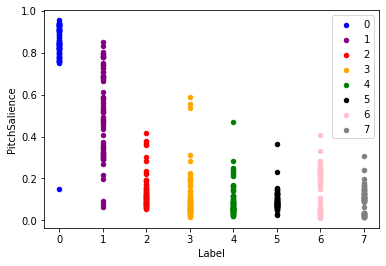

In [8]:
colors = {0:'blue',1:'purple',2:'red',3:'orange',4:'green',5:'black',6:'pink',7:'grey'}
fig, ax = plt.subplots()
grouped = merged_data.groupby('Label')
for key,group in grouped:
    group.plot(ax=ax, kind='scatter', x='Label', y='PitchSalience', label=key, color = colors[key])
plt.show()

# Dividing Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
                                                   

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((358, 72), (154, 72), (358,), (154,))

# Cross Validation and K Folding

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=100, random_state=42))


In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, random_state=42))])

In [13]:
print('Model Accuracy RBF: %.2f' % pipeline.score(X_test, y_test))


Model Accuracy RBF: 0.94


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=10)

In [15]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.91666667 0.88888889 0.94444444 0.94444444 0.97222222 0.88888889
 0.91666667 0.97222222 0.97142857 0.94285714]


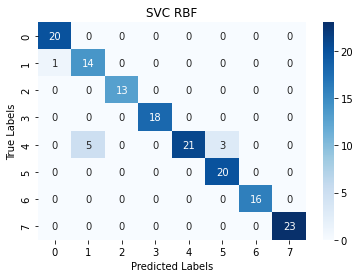

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
s=pipeline.predict(X_test)
cm = confusion_matrix(y_test, s)
sns.heatmap(cm, annot=True, cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVC RBF')

# Show the plot
plt.show()

## import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, s)

No handles with labels found to put in legend.


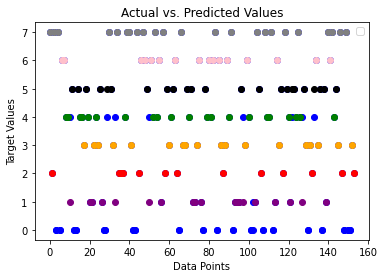

In [17]:
import matplotlib.pyplot as plt

# Define the colors dictionary
colors = {0: 'blue', 1: 'purple', 2: 'red', 3: 'orange', 4: 'green', 5: 'black', 6: 'pink', 7: 'grey'}

# Create the scatter plot for actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='blue')
for i in range(len(y_test)):
    plt.scatter(i, s[i], color=colors[s[i]])

# Set labels and title
plt.xlabel("Data Points")
plt.ylabel("Target Values")
plt.title("Actual vs. Predicted Values")

# Add legend
plt.legend()

# Show the plot
plt.show()


In [18]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

# Crossvalidation

In [19]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=rfc, 
param_grid=param_grid,
cv=kfold,
n_jobs=-1)

In [22]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [23]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [24]:
rfc1=RandomForestClassifier(max_features='auto',n_estimators=500,max_depth=6,criterion='gini')
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=500)

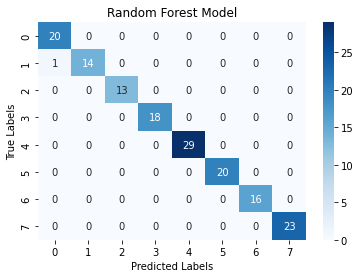

In [25]:
y_pred=rfc1.predict(X_test)
y_pred=rfc1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Model')

# Show the plot
plt.show()


In [26]:
accuracy = rfc1.score(X_test, y_test)
print(accuracy)

0.9935064935064936


# MODELS GAUSSIAN KNN DESICION TREE 

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
gnb = GaussianNB().fit(X_train, y_train)
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
estim2 = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovr'))
svc=SVC(decision_function_shape='ovo').fit(X_train,y_train)
clf = svm.SVC(kernel='rbf', C=10).fit(X_train, y_train)


# Predictions